In [1]:
import os 
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
from pathlib import Path
from PIL import Image
import time
tqdm.pandas()

In [2]:
DATA_PATH_CLEAN = "/media/data_dump/Shivangi/Mudit/dataset/gossipcop/our_gossip_combined.csv"
DATA_PATH_RAW = "/media/data_dump/Shivangi/Mudit/dataset/raw_gossipcop/raw_gossipcop_data_final.csv"

In [3]:
IMAGE_ROOT_DIR_CLEAN = "/media/data_dump/Shivangi/Mudit/dataset/gossipcop/gossipcop_images/"
IMAGE_ROOT_DIR_RAW = "/media/data_dump/Shivangi/Mudit/dataset/raw_gossipcop/"

In [4]:
df_clean = pd.read_csv(DATA_PATH_CLEAN, sep="\t")
df_raw = pd.read_csv(DATA_PATH_RAW)

In [5]:
df_clean.head()

,Unnamed: 0,Unnamed: 0.1,news_id,url,title,content,images,tweet_ids,image_list,label,clean_nb_imgs
0,0,984,gossipcop-3507938806,www.foxnews.com/entertainment/2017/07/12/donal...,Donald Trump Jr. releases email exchange: Cele...,Donald Trump Jr. has been making headlines thi...,['fake_gossipcop-3507938806_headshot-48513.jpg...,885131701877428224\t885131769896472577\t885131...,['fake_gossipcop-3507938806_headshot-48513.jpg...,1,3
1,1,1579,gossipcop-8115207261,www.dailystar.co.uk/showbiz/678030/Lady-Gaga-p...,What has Lady Gaga done to her face? Plastic s...,The video will auto-play soon 8 Cancel\n\nSign...,['fake_gossipcop-8115207261_1219768.jpg'],958296018965225472\t958331247956320256\t958343...,['fake_gossipcop-8115207261_1219768.jpg'],1,1
2,2,657,gossipcop-7544598697,www.hollywoodreporter.com/news/oscars-2017-mem...,"Oscars ""In Memoriam"": Garry Shandling, Robert ...","Oscars ""In Memoriam"": Garry Shandling, Robert ...",['fake_gossipcop-7544598697_split_vaughn_shand...,836090741512273921\t836092215893995520\t836098...,['fake_gossipcop-7544598697_split_vaughn_shand...,1,2
3,3,952,gossipcop-3645597267,www.girlfriend.com.au/kourtney-kardashian-blas...,Kourtney Kardashian blasts pregnant sister Khl...,Video from the upcoming season finale of Keepi...,['fake_gossipcop-3645597267_1000-khloe-kourtne...,970403514911358976\t992690721353236482\t102183...,['fake_gossipcop-3645597267_1000-khloe-kourtne...,1,1
4,4,1581,gossipcop-5241351348,spinditty.com/genres/Why-Madonna-Succeeded-Whe...,Why Madonna Succeeded Where Cyndi Lauper Failed,Madonna and Cyndi Lauper appeared on the music...,"['fake_gossipcop-5241351348_8437876.jpg', 'fak...",389894905788502016\t390585558646681600\t430426...,"['fake_gossipcop-5241351348_8437876.jpg', 'fak...",1,3


In [6]:
df_raw.head()

,Unnamed: 0,Unnamed: 0.1,unique_id,title,text,im_links,nb_im_links,label,im_list,clean_nb_imgs
0,0,0,gossipcop-946696,"World's Ugliest Dog title goes to ... Zsa Zsa,...","Associated Press\n\nPETALUMA, Calif. (AP) — A ...",https://www.gannett-cdn.com/-mm-/34cb5eda691ff...,2,0,gossipcop/real/gossipcop-946696/Images/gossipc...,2
1,1,1,gossipcop-912908,Tyler Perry’s House Of Payne Is Coming Back to...,Tyler Perry’s breakout television series House...,https://thetoptea.com/wp-content/uploads/the-h...,6,0,gossipcop/real/gossipcop-912908/Images/gossipc...,6
2,2,2,gossipcop-914944,Kesha postpones spring tour dates ahead of sur...,"Kesha’s fans in Australia, New Zealand, Taiwan...",https://imagesvc.meredithcorp.io/v3/mm/image?u...,7,0,gossipcop/real/gossipcop-914944/Images/gossipc...,5
3,3,3,gossipcop-908959,Kim Kardashian shuts down rumors about baby nu...,Kim Kardashian and husband Kanye West aren't a...,https://i.dailymail.co.uk/1s/2020/10/02/16/339...,487,0,gossipcop/real/gossipcop-908959/Images/gossipc...,484
4,4,4,gossipcop-881260,Kevin Hart's Extortion Case & Cheating Rumors:...,The FBI is reportedly investigating an alleged...,https://peopledotcom.files.wordpress.com/2018/...,14,0,gossipcop/real/gossipcop-881260/Images/gossipc...,11


In [7]:
df_clean = df_clean.rename(columns={'news_id': 'unique_id'})

Finding image properties

In [22]:
def image_properties(img_list, IMAGE_ROOT_DIR, df):
    
#     img_list = img_list.strip("][").split(", ")
    img_list = img_list.split(";")
    for img_name in img_list:
#         img = Path(IMAGE_ROOT_DIR) / img_name[1:-1]
        img = Path(IMAGE_ROOT_DIR) / img_name
        try:
            image = Image.open(img).convert("RGB") ## Read the image
            
            df.loc[len(df.index)] = [str(img), image.size[0], image.size[1], image.size[1]/image.size[0]]
        except Exception as e:
            continue

In [16]:
clean_images_prop = pd.DataFrame(columns=['image_name', "height", "width", "aspect_ratio"])
df_clean.progress_apply(lambda row: image_properties(row['images'], IMAGE_ROOT_DIR_CLEAN, clean_images_prop), axis=1)

  0%|          | 0/3480 [00:00<?, ?it/s]

/home/shivangi/.conda/envs/fakenews/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0       None
1       None
2       None
3       None
4       None
        ... 
3475    None
3476    None
3477    None
3478    None
3479    None
Length: 3480, dtype: object

In [18]:
clean_images_prop.shape

(6082, 4)

In [20]:
clean_images_prop.head()

,image_name,height,width,aspect_ratio
0,/media/data_dump/Shivangi/Mudit/dataset/gossip...,340,340,1.000000
1,/media/data_dump/Shivangi/Mudit/dataset/gossip...,1296,864,0.666667
2,/media/data_dump/Shivangi/Mudit/dataset/gossip...,1296,864,0.666667
3,/media/data_dump/Shivangi/Mudit/dataset/gossip...,1200,630,0.525000
4,/media/data_dump/Shivangi/Mudit/dataset/gossip...,1296,730,0.563272


In [ ]:
clean_images_prop.to_csv("./image_properties_csv/clean_images_properties.csv")

In [ ]:
raw_images_prop = pd.DataFrame(columns=['image_name', "height", "width", "aspect_ratio"])
df_raw.progress_apply(lambda row: image_properties(row['im_list'], IMAGE_ROOT_DIR_RAW, raw_images_prop), axis=1)

  0%|          | 0/15193 [00:00<?, ?it/s]

/home/shivangi/.conda/envs/fakenews/lib/python3.7/site-packages/PIL/Image.py:2957: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/home/shivangi/.conda/envs/fakenews/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/shivangi/.conda/envs/fakenews/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:793: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/home/shivangi/.conda/envs/fakenews/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 19. Skipping tag 42036
  "Possibly corrupt EXIF data.  "


In [ ]:
raw_images_prop.to_csv("./image_properties_csv/raw_images_properties.csv")

In [ ]:
raw_images_prop.head()

In [ ]:
df_raw.shape

In [4]:
raw_images_prop = pd.read_csv("./image_properties_csv/raw_images_properties.csv")
clean_images_prop = pd.read_csv("./image_properties_csv/clean_images_properties.csv")

In [10]:
clean_images_prop.iloc[0]['image_name']

'/media/data_dump/Shivangi/Mudit/dataset/gossipcop/gossipcop_images/fake_gossipcop-3507938806_headshot-48513.jpg'

In [7]:
def find_ui_raw(image_name):
    start = "raw_gossipcop/gossipcop/"
    end = "/Images/"
    ui = image_name[image_name.find(start)+len(start):image_name.rfind(end)].split("/")[1]
    return ui

In [8]:
raw_images_prop['unique_id'] = raw_images_prop.progress_apply(lambda row: find_ui_raw(row['image_name']), axis=1)

  0%|          | 0/506478 [00:00<?, ?it/s]

In [11]:
raw_images_prop.to_csv("./image_properties_csv/raw_images_properties.csv")
raw_images_prop.head()

,Unnamed: 0,image_name,height,width,aspect_ratio,unique_id
0,0,/media/data_dump/Shivangi/Mudit/dataset/raw_go...,3200,1808,0.565000,gossipcop-946696
1,1,/media/data_dump/Shivangi/Mudit/dataset/raw_go...,660,373,0.565152,gossipcop-946696
2,2,/media/data_dump/Shivangi/Mudit/dataset/raw_go...,20,11,0.550000,gossipcop-912908
3,3,/media/data_dump/Shivangi/Mudit/dataset/raw_go...,164,164,1.000000,gossipcop-912908
4,4,/media/data_dump/Shivangi/Mudit/dataset/raw_go...,200,200,1.000000,gossipcop-912908


In [12]:
def find_ui_clean(image_name):
    start = "gossipcop/gossipcop_images/"
    end = ".jpg"
    ui = image_name[image_name.find(start)+len(start):image_name.rfind(end)].split("_")[1]
    return ui

In [13]:
clean_images_prop['unique_id'] = clean_images_prop.progress_apply(lambda row: find_ui_clean(row['image_name']), axis=1)

  0%|          | 0/6082 [00:00<?, ?it/s]

In [15]:
clean_images_prop.to_csv("./image_properties_csv/clean_images_properties.csv")
clean_images_prop.head()

,Unnamed: 0,image_name,height,width,aspect_ratio,unique_id
0,0,/media/data_dump/Shivangi/Mudit/dataset/gossip...,340,340,1.000000,gossipcop-3507938806
1,1,/media/data_dump/Shivangi/Mudit/dataset/gossip...,1296,864,0.666667,gossipcop-3507938806
2,2,/media/data_dump/Shivangi/Mudit/dataset/gossip...,1296,864,0.666667,gossipcop-3507938806
3,3,/media/data_dump/Shivangi/Mudit/dataset/gossip...,1200,630,0.525000,gossipcop-8115207261
4,4,/media/data_dump/Shivangi/Mudit/dataset/gossip...,1296,730,0.563272,gossipcop-7544598697


In [18]:
def get_img_size(image_name):
    return os.stat(image_name).st_size

In [19]:
clean_images_prop['image_size'] = clean_images_prop.progress_apply(lambda row: get_img_size(row['image_name']), axis=1)

  0%|          | 0/6082 [00:00<?, ?it/s]

In [21]:
clean_images_prop.to_csv("./image_properties_csv/clean_images_properties.csv")
clean_images_prop.head()

,Unnamed: 0,image_name,height,width,aspect_ratio,unique_id,image_size
0,0,/media/data_dump/Shivangi/Mudit/dataset/gossip...,340,340,1.000000,gossipcop-3507938806,15592
1,1,/media/data_dump/Shivangi/Mudit/dataset/gossip...,1296,864,0.666667,gossipcop-3507938806,264416
2,2,/media/data_dump/Shivangi/Mudit/dataset/gossip...,1296,864,0.666667,gossipcop-3507938806,264416
3,3,/media/data_dump/Shivangi/Mudit/dataset/gossip...,1200,630,0.525000,gossipcop-8115207261,102164
4,4,/media/data_dump/Shivangi/Mudit/dataset/gossip...,1296,730,0.563272,gossipcop-7544598697,150689


In [22]:
raw_images_prop['image_size'] = raw_images_prop.progress_apply(lambda row: get_img_size(row['image_name']), axis=1)

  0%|          | 0/506478 [00:00<?, ?it/s]

In [24]:
raw_images_prop.to_csv("./image_properties_csv/raw_images_properties.csv")
raw_images_prop.head()

,Unnamed: 0,image_name,height,width,aspect_ratio,unique_id,image_size
0,0,/media/data_dump/Shivangi/Mudit/dataset/raw_go...,3200,1808,0.565000,gossipcop-946696,609649
1,1,/media/data_dump/Shivangi/Mudit/dataset/raw_go...,660,373,0.565152,gossipcop-946696,26261
2,2,/media/data_dump/Shivangi/Mudit/dataset/raw_go...,20,11,0.550000,gossipcop-912908,10531
3,3,/media/data_dump/Shivangi/Mudit/dataset/raw_go...,164,164,1.000000,gossipcop-912908,176
4,4,/media/data_dump/Shivangi/Mudit/dataset/raw_go...,200,200,1.000000,gossipcop-912908,11409


In [16]:
os.stat('/media/data_dump/Shivangi/Mudit/dataset/gossipcop/gossipcop_images/fake_gossipcop-3507938806_headshot-48513.jpg').st_size

15592

In [17]:
os.path.getsize('/media/data_dump/Shivangi/Mudit/dataset/gossipcop/gossipcop_images/fake_gossipcop-3507938806_headshot-48513.jpg')

15592

In [8]:
df_merged = pd.merge(df_clean, df_raw, on="unique_id")

In [9]:
df_clean.shape, df_raw.shape, df_merged.shape

((3480, 11), (15193, 10), (2946, 20))

In [84]:
df = pd.DataFrame(columns=['unique_id', 'M_dash', 'M'])
df['unique_id'] = df_merged['unique_id']
df['M'] = df_merged['im_list'] ## Raw
df['M_dash'] = df_merged['images'] ## clean

In [85]:
def read_images(img_list, IMAGE_ROOT_DIR):

    final_img_inp = [] ## Store multiple images 

    for img_name in img_list:
        img = Path(IMAGE_ROOT_DIR) / img_name
        try:
            image = Image.open(img).convert("RGB") ## Read the image
        except Exception as e:
            continue

        final_img_inp.append(image)

    return final_img_inp

In [67]:
def create_group_column(M, M_dash):
    overlap = 0
    M = read_images(M.split(";"), IMAGE_ROOT_DIR_RAW)
    not_present = []
    M_minus_M_dash = []
    for img_name in M_dash.strip("][").split(", "):
        img = Path(IMAGE_ROOT_DIR_CLEAN) / img_name[1:-1]
        try:
            image = Image.open(img).convert("RGB") ## Read the image
        except Exception as e:
            continue
        for img in M:
            if np.all(np.array(image)==np.array(img)):
                overlap += 1
            else:
                
        
    return overlap

In [68]:
%matplotlib inline

In [69]:
overlap = df.progress_apply(lambda row: create_group_column(row['M'], row['M_dash']), axis=1)

  0%|          | 0/2946 [00:00<?, ?it/s]

/home/shivangi/.conda/envs/fakenews/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/home/shivangi/.conda/envs/fakenews/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/shivangi/.conda/envs/fakenews/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:793: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/home/shivangi/.conda/envs/fakenews/lib/python3.7/site-packages/PIL/Image.py:2957: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


In [11]:
import matplotlib.pyplot as plt

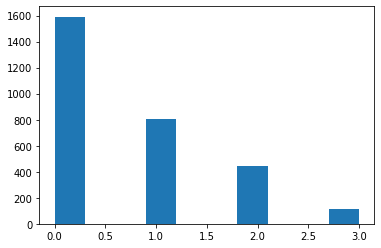

In [71]:
plt.hist(overlap)
plt.show()

In [72]:
np.unique(np.array(overlap), return_counts=True)

(array([0, 1, 2, 3]), array([1591,  802,  443,  110]))

Didn't work

In [12]:
from subprocess import run

In [28]:
root_dir = "/media/nas_mount/Shivangi/mudit/code/case_studies/"
# !pwd

In [75]:
def read_images(img_list, IMAGE_ROOT_DIR):

    final_img_inp = [] ## Store multiple images 
    cmd = [f'{root_dir}ThreatExchange/pdq/cpp/pdq-photo-hasher']
    for img_name in img_list:
        img = Path(IMAGE_ROOT_DIR) / img_name
        try:
            image = Image.open(img).convert("RGB") ## Read the image
            out = run(cmd+[str(img)], capture_output=True).stdout
            final_img_inp.append(str(out).split(",")[0][2:])
        except Exception as e:
            continue
    return final_img_inp

In [80]:
def create_group_column(M, M_dash):
    overlap = 0
    M_hsh = read_images(M.split(";"), IMAGE_ROOT_DIR_RAW)
    cmd = [f'{root_dir}ThreatExchange/pdq/cpp/pdq-photo-hasher']
    not_present = []
    M_minus_M_dash = []
    for img_name in M_dash.strip("][").split(", "):
        img = Path(IMAGE_ROOT_DIR_CLEAN) / img_name[1:-1]
        try:
            image = Image.open(img).convert("RGB") ## Read the image
            out = run(cmd+[str(img)], capture_output=True).stdout
#             print(type(out))
            out = str(out).split(",")[0]
#             print(out)
        except Exception as e:
            print(str(e))
            continue
#         print(M_hsh)
        if out in M_hsh:
            overlap +=1
    
    return overlap

In [81]:
overlap = df.progress_apply(lambda row: create_group_column(row['M'], row['M_dash']), axis=1)

  0%|          | 0/2946 [00:00<?, ?it/s]

/home/shivangi/.conda/envs/fakenews/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/shivangi/.conda/envs/fakenews/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:793: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


[Errno 2] No such file or directory: '/media/data_dump/Shivangi/Mudit/dataset/gossipcop/gossipcop_images/fake_gossipcop-1603411545_2148114-cartoonthfebruary-1581355595-282-160x120.jpg'


/home/shivangi/.conda/envs/fakenews/lib/python3.7/site-packages/PIL/Image.py:2957: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


[Errno 2] No such file or directory: '/media/data_dump/Shivangi/Mudit/dataset/gossipcop/gossipcop_images/fake_gossipcop-764773843_1533140472_6a0577fe75a8801686518f55e1d2f091.jpg'
[Errno 2] No such file or directory: '/media/data_dump/Shivangi/Mudit/dataset/gossipcop/gossipcop_images/fake_gossipcop-2301664029_2148114-cartoonthfebruary-1581355595-282-160x120.jpg'


In [83]:
np.unique(np.array(overlap), return_counts=True)

(array([0]), array([2946]))

In [46]:
command_hasher= f'{root_dir}ThreatExchange/pdq/cpp/pdq-photo-hasher /media/data_dump/Shivangi/Mudit/dataset/gossipcop/gossipcop_images/fake_gossipcop-7120665185_edfc9db90cd6588e985fbf3bbb4d7529_xl.jpg'

In [69]:
output = run(cmd, capture_output=True).stdout

In [70]:
output

b'267f2f73b17f5d082e818df1da010d95837f26db1325b4792b629293a90d734c,100,/media/data_dump/Shivangi/Mudit/dataset/gossipcop/gossipcop_images/fake_gossipcop-7305394933_gettyimages-162611431.jpg\n'

In [73]:
str(output)

"b'267f2f73b17f5d082e818df1da010d95837f26db1325b4792b629293a90d734c,100,/media/data_dump/Shivangi/Mudit/dataset/gossipcop/gossipcop_images/fake_gossipcop-7305394933_gettyimages-162611431.jpg\\n'"

In [48]:
import subprocess

In [50]:
cmd = [f'{root_dir}ThreatExchange/pdq/cpp/pdq-photo-hasher', '/media/data_dump/Shivangi/Mudit/dataset/gossipcop/gossipcop_images/fake_gossipcop-7305394933_gettyimages-162611431.jpg']

In [51]:
subprocess.Popen(cmd, stdout=subprocess.PIPE ).communicate()[0]

b'267f2f73b17f5d082e818df1da010d95837f26db1325b4792b629293a90d734c,100,/media/data_dump/Shivangi/Mudit/dataset/gossipcop/gossipcop_images/fake_gossipcop-7305394933_gettyimages-162611431.jpg\n'